# Verifica su numpy e matplotlib, 10/02/23, 5Brob

### MARCHISIO RAFFAELE

## Esercizio: automobili canadesi
Il file `Fuel_Consumption_2000-2022.csv`contiene i dati di numerose automobili commercializzate in Canada tra il 2000 e il 2022. I dati caratterizzano i diversi autoveicoli sulla base delle loro emissioni di CO2, sui loro consumi e sui loro motori.
Le colonne del file .csv sono: 
- 'YEAR': anno
- 'MAKE': marca
- 'MODEL' modello
- 'VEHICLE CLASS': tipo di veicolo
- 'ENGINE SIZE': dimensione del motore
- 'CYLINDERS': numero di cilindri
- 'TRANSMISSION': tipo di cambio
- 'FUEL': tipo di carburante
- 'FUEL CONSUMPTION': consumo di carburante
- 'HWY (L/100 km)': consumo in autostrada
- 'COMB (L/100 km)': consumo combinato
- 'COMB (mpg)': comsumo combinato in galloni per miglio
- 'EMISSIONS': emissioni di CO2

Rispondi alle seguenti domande.
1. Crea un grafico a dispersione nel quale mostri se c'è qualche correlazione tra 'EMISSIONS', 'FUEL CONSUMPTION' e 'ENGINE SIZE'. Sfrutta adeguatamente i colori o la dimensione dei punti.

2. In media hanno più emissioni le auto a gasolio (FUEL=D) oppure le auto a benzina (FUEL = X o FUEL = Z)?

3. Quale tipo di veicolo ('VEHICLE CLASS') consuma meno? E quale ha meno emissioni (EMISSIONS)?

4. Scegli una marca di autoveicoli (che abbia almeno 100 automobili nei dati): per gli autoveicoli della marca scelta crea una dataframe che contenga i numero di autoveicoli per ogni tipolgia di carburante (FUEL).

5. Per gli autoveicoli della marca che hai scelto sopra, crea un istogramma delle emissioni (EMISSIONS).

6. **BONUS** Crea una aggregazione sul dataframe che, per ogni marca, restituisca il modello con le emissioni (EMISSIONS) minori.

### --------------------------------------------------------------------------------------------------------------

#### NOTA
Qui sotto trovi altre informazioni su alcune delle colonne del file. Se hai problemi con l'inglese, chiedi!

##### Model
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- `#` = High output engine that provides more power than the standard engine of the same size 

##### Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

##### Fuel
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

##### Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Fuel_Consumption_2000-2022.csv")
data

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 KM),COMB (L/100 KM),COMB (MPG),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,VOLVO,XC40 T5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,VOLVO,XC60 B5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,VOLVO,XC60 B6 AWD,SUV: SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,VOLVO,XC90 T5 AWD,SUV: STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


1. Crea un grafico a dispersione nel quale mostri se c'è qualche correlazione tra 'EMISSIONS', 'FUEL CONSUMPTION' e 'ENGINE SIZE'. Sfrutta adeguatamente i colori o la dimensione dei punti.

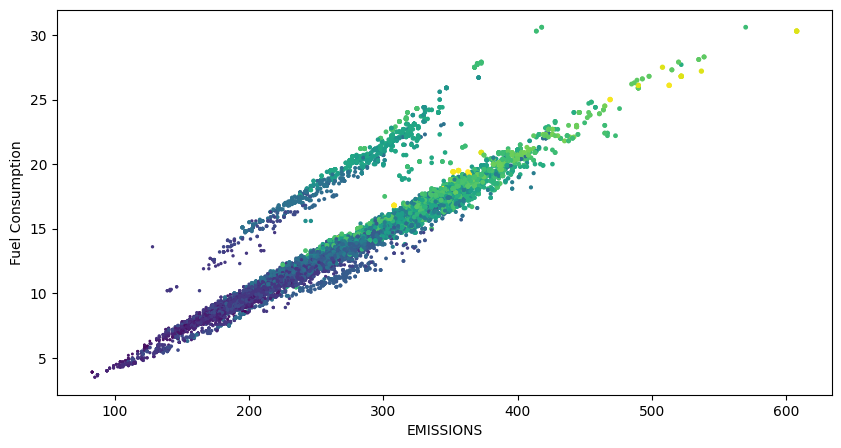

In [5]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(data['EMISSIONS'],data['FUEL CONSUMPTION'], data["ENGINE SIZE"], c=data["ENGINE SIZE"])
ax.set_xlabel("EMISSIONS")
ax.set_ylabel("Fuel Consumption")
plt.show()

2. In media hanno più emissioni le auto a gasolio (FUEL=D) oppure le auto a benzina (FUEL = X o FUEL = Z)?

In [6]:
#in media hanno piu emissioni le auto a benzina
meanemissionfuel=data[["FUEL","EMISSIONS"]].groupby("FUEL").mean()
meanemissionfuel

,EMISSIONS
FUEL,
D,230.305732
E,270.578898
N,312.848485
X,240.280748
Z,260.574818


3. Quale tipo di veicolo ('VEHICLE CLASS') consuma meno? E quale ha meno emissioni (EMISSIONS)?


In [7]:
#il tipo di auto che consuma di meno è STATION WAGON:SMALL
data[['VEHICLE CLASS','FUEL CONSUMPTION']].groupby("VEHICLE CLASS").max().sort_values(by="FUEL CONSUMPTION")

,FUEL CONSUMPTION
VEHICLE CLASS,
STATION WAGON: SMALL,12.4
PICKUP TRUCK: SMALL,15.8
SPECIAL PURPOSE VEHICLE,16.8
STATION WAGON - MID-SIZE,17.4
PICKUP TRUCK - SMALL,17.7
STATION WAGON - SMALL,18.1
SUV: SMALL,19.1
SUV - SMALL,19.1
MINIVAN,19.7


In [8]:
#il tipo di auto che ha meno emissioni è STATION WAGON:SMALL
data[['VEHICLE CLASS','EMISSIONS']].groupby("VEHICLE CLASS").max().sort_values(by=["EMISSIONS"])

,EMISSIONS
VEHICLE CLASS,
STATION WAGON: SMALL,260
SPECIAL PURPOSE VEHICLE,298
MINIVAN,331
PICKUP TRUCK - SMALL,331
PICKUP TRUCK: SMALL,331
STATION WAGON - MID-SIZE,336
STATION WAGON - SMALL,345
SUV - SMALL,353
VAN: PASSENGER,355


4. Scegli una marca di autoveicoli (che abbia almeno 100 automobili nei dati): per gli autoveicoli della marca scelta crea una dataframe che contenga i numero di autoveicoli per ogni tipolgia di carburante (FUEL).

In [9]:
marca=data[["MAKE","MODEL"]].groupby("MAKE").count()
marca100=marca[marca["MODEL"]>100]
marca100

,MODEL
MAKE,
ACURA,247
ASTON MARTIN,106
AUDI,805
BENTLEY,118
BMW,1490
BUICK,273
CADILLAC,434
CHEVROLET,2130
CHRYSLER,425


In [13]:
marca="CHEVROLET"
d=data[data["MAKE"]==marca][["FUEL","MODEL"]].groupby("FUEL").count()
d.rename(columns={"MODEL":"N_AUTO"},inplace=True)
d


,N_AUTO
FUEL,
D,50
E,308
N,11
X,1495
Z,266


5. Per gli autoveicoli della marca che hai scelto sopra, crea un istogramma delle emissioni (EMISSIONS).


In [14]:
emissioni=data[data["MAKE"]==marca][["EMISSIONS"]]
emissioni

,EMISSIONS
71,308
72,317
73,294
74,324
75,294
...,...
21845,197
21846,260
21847,277
21848,201


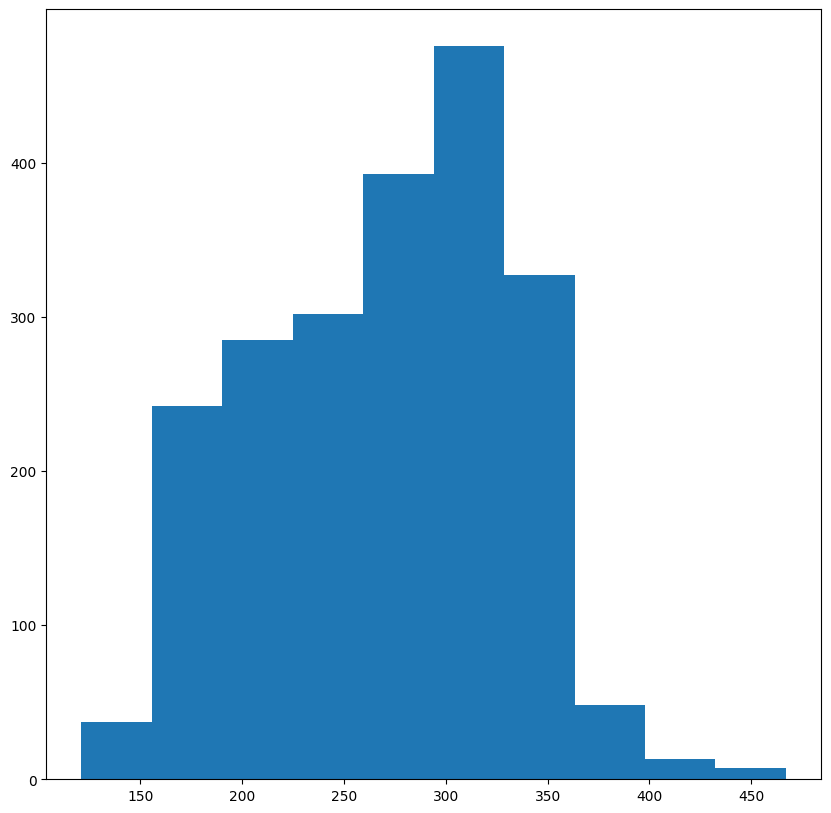

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(emissioni["EMISSIONS"])
plt.show()